In [2]:
import numpy as np
import xarray as xr
import shapely
import itertools
from tqdm import tqdm
import pandas as pd
import geopandas as gpd
import rioxarray as rxr
from glob import glob
from scipy.linalg import lstsq
from datetime import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt

In [5]:
import geopandas as gpd

glimps_gdf = gpd.read_file('../shapefiles/glims_polygons.shp')
aoi = np.array([-121.96, 48.713,-121.6869, 48.713,-121.6869, 48.8539,-121.96, 48.8539,-121.96, 48.713])
lats, lons = aoi[::2], aoi[1::2]
bounds = np.array([lats.min(), lons.min(), lats.max(), lons.max()])
glimps_gdf_aoi = glimps_gdf.clip(bounds)

In [2]:
vel3d = xr.open_dataset('/mnt/Backups/ayushg12/GDA_proj/offsets/3d_vel.nc')

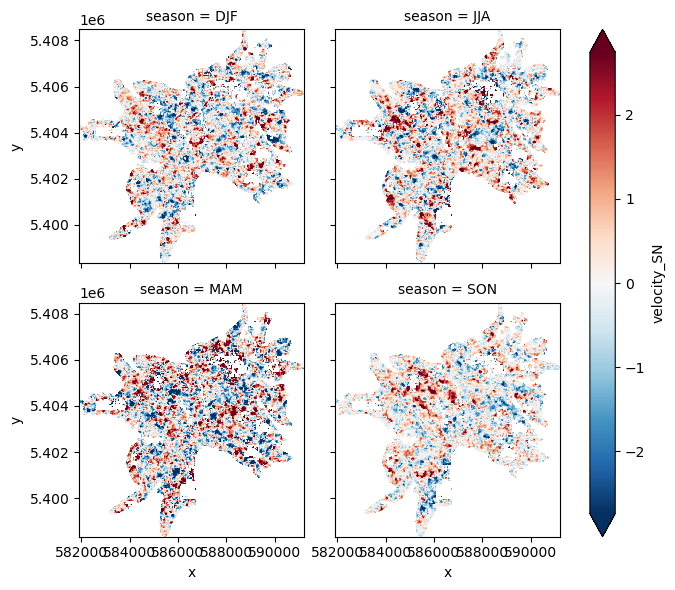

In [8]:
vel3d['velocity_SN'].groupby('time.season').mean().plot.imshow(col='season', col_wrap=2, robust=True)

/tmp/ipykernel_8919/3949748789.py:2: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


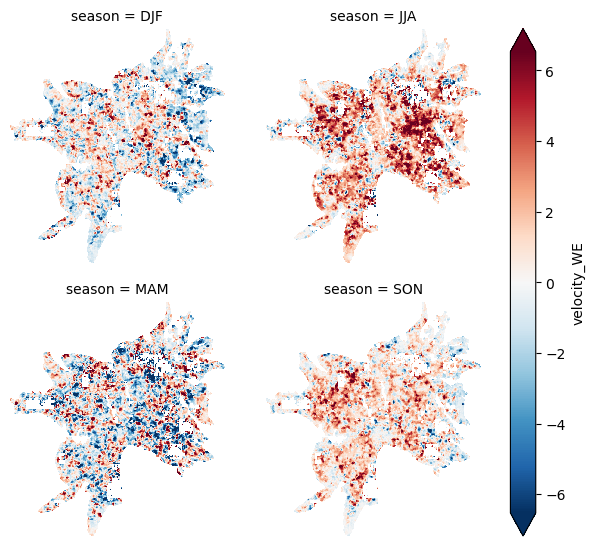

In [15]:
p = vel3d['velocity_WE'].groupby('time.season').mean().plot.imshow(col='season', col_wrap=2, robust=True)
for ax in p.axes.flat:
    ax.set_aspect('equal')
    ax.axis('off')

/tmp/ipykernel_8919/1395952952.py:1: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  p.axes


array([[<Axes: title={'center': 'season = DJF'}, ylabel='y'>,
        <Axes: title={'center': 'season = JJA'}>],
       [<Axes: title={'center': 'season = MAM'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'season = SON'}, xlabel='x'>]],
      dtype=object)

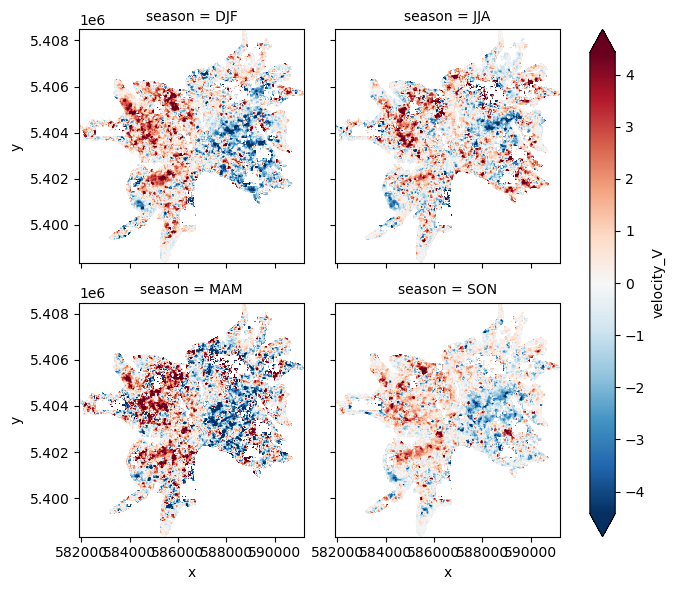

In [10]:
vel3d['velocity_V'].groupby('time.season').mean().plot.imshow(col='season', col_wrap=2, robust=True)